In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
#pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.


In [2]:

# Cargamos el dataframe
df = pd.read_csv('data/train.csv', index_col='id', parse_dates=['fecha'])


In [3]:
df.titulo

id
254099                                    depto. tipo a-402
53461                        condominio horizontal en venta
247984                casa en venta urbi 3 recamaras tonala
209067    casa sola en toluca zinacantepec con credito i...
185997                                       paseos del sol
126147                       departamento en venta taxqueña
139233                   de oportunidad casa en san lorenzo
5013      casa emilia en venta en selvamar playa del carmen
44962     pre- venta preciosos depas 2 recamaras con sub...
134537                                              terreno
51180                                         mi 2° credito
103293    departamento en venta, san pedro garza garcia,...
47890                hermosa casa en zibata queretaro 170m²
130216                   casa matias romero - sión bancaria
181436                          casa en venta en valle real
201923                 casa en venta lomas verdes naucalpan
283945                 preciosa casa 

In [ ]:

print(f"Shape: {df.shape}")
print(f"Columnas: {df.columns}")
df.head()

In [17]:
df['tipodepropiedad'].unique().size


25

In [ ]:
df[df.tipodepropiedad == 'Apartamento'].head(10)

In [4]:
df['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

df.groupby(['provincia', 'ciudad']).ciudad.value_counts().nlargest(10)


In [ ]:
df['provincia'].value_counts().head(10)

In [ ]:
df[df.provincia == 'Distrito Federal'].groupby(['tipodepropiedad']).ciudad.value_counts()

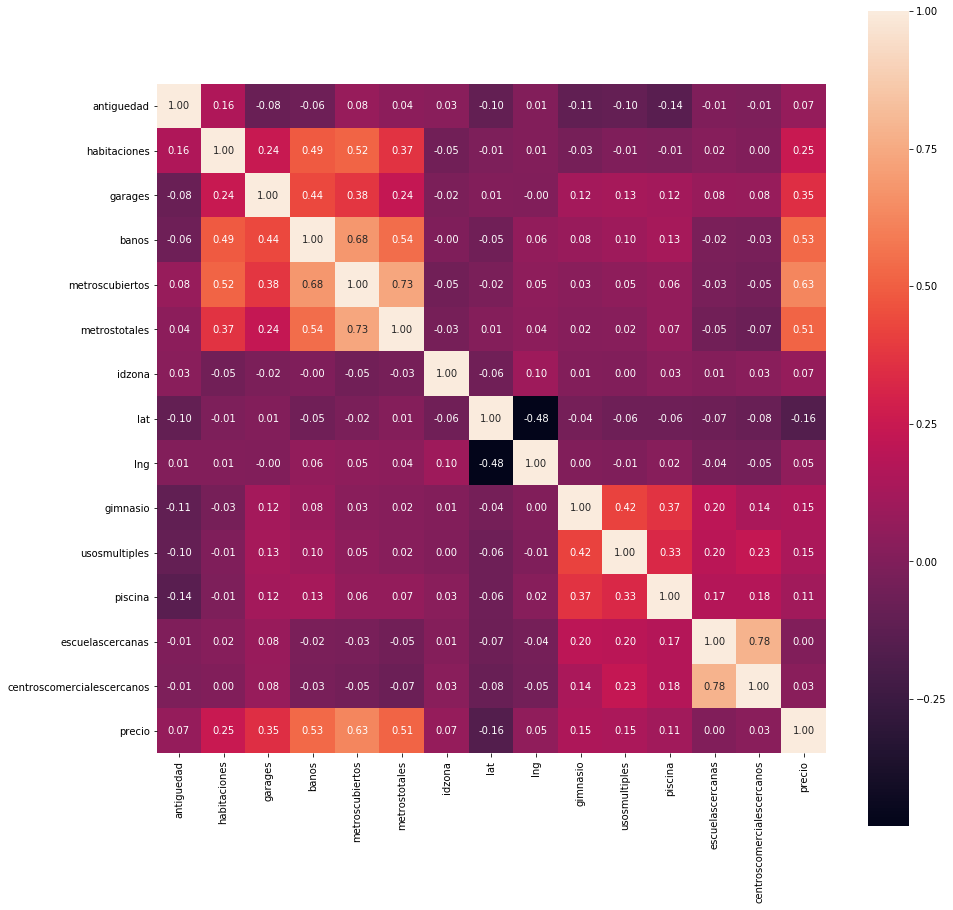

In [5]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f');

In [ ]:
df.corr()

In [4]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

#df = pd.DataFrame({'Correlacion':so.index, 'count':so.values})

print(so[so.values < 1.0].head(25))

centroscomercialescercanos  escuelascercanas             0.78
escuelascercanas            centroscomercialescercanos   0.78
metroscubiertos             metrostotales                0.73
metrostotales               metroscubiertos              0.73
banos                       metroscubiertos              0.68
metroscubiertos             banos                        0.68
                            precio                       0.63
precio                      metroscubiertos              0.63
banos                       metrostotales                0.54
metrostotales               banos                        0.54
banos                       precio                       0.53
precio                      banos                        0.53
habitaciones                metroscubiertos              0.52
metroscubiertos             habitaciones                 0.52
metrostotales               precio                       0.51
precio                      metrostotales                0.51
habitaci

In [5]:
so = df.groupby(by=['provincia','tipodepropiedad']).size().sort_values(kind="quicksort", ascending=False)
#print(so)
#print(so[so.values < 1.0].head(25))

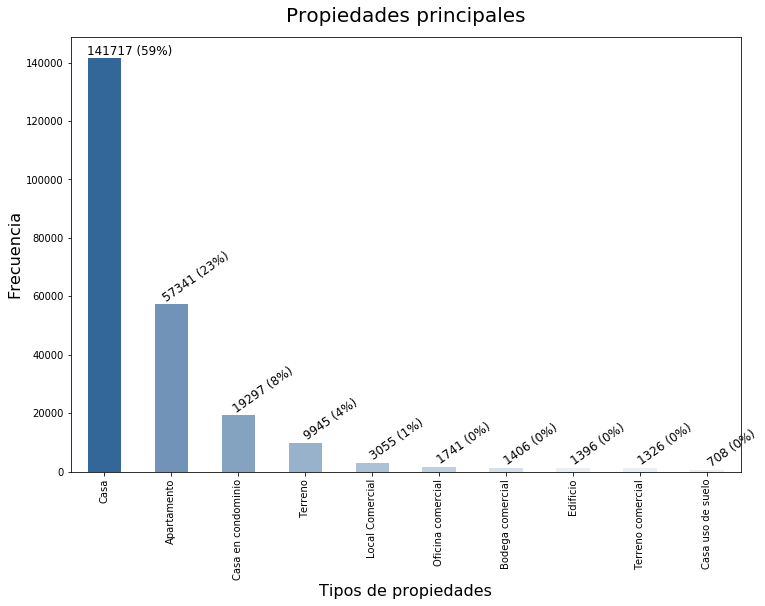

In [6]:
tiposPrincipales = df.tipodepropiedad.value_counts().sort_values(kind="quicksort", ascending=False).to_frame()
tiposPrincipales['porcentaje'] = tiposPrincipales.values / tiposPrincipales.values.sum() * 100
tiposPrincipales = tiposPrincipales.head(10)

# print(tiposPrincipales)
plt.figure(figsize=(12, 8))
ax = tiposPrincipales.tipodepropiedad.plot(kind='bar', color=[(0.2, 0.4, 0.6, 1)
                                                            , (0.2, 0.4, 0.6, 0.7)
                                                            , (0.2, 0.4, 0.6, 0.6)
                                                            , (0.2, 0.4, 0.6, 0.5)
                                                            , (0.2, 0.4, 0.6, 0.4)
                                                            , (0.2, 0.4, 0.6, 0.3)
                                                            , (0.2, 0.4, 0.6, 0.2)
                                                            , (0.2, 0.4, 0.6, 0.1)
                                                            , (0.2, 0.4, 0.6, 0.1)
                                                            , (0.2, 0.4, 0.6, 0.1)                                                             
                                                             ])
ax.set_title('Propiedades principales', fontsize=20, y=1.02)
ax.set_xlabel('Tipos de propiedades', fontsize=16)
ax.set_ylabel('Frecuencia', fontsize=16)
ax.set_xticklabels(tiposPrincipales.tipodepropiedad.index)

rects = ax.patches
# Make some labels.
# print(tiposPrincipales[:1].porcentaje)
# print(len(tiposPrincipales.index))
labels = [str(int(row.tipodepropiedad)) + ' (' + str(int(row.porcentaje)) + '%)' for index, row in tiposPrincipales.iterrows()]
# print(labels)
angle = 0
i = 0
for rect, label in zip(rects, labels):
    if i != 0:
        angle = 35
    height = rect.get_height()
    ax.text(rect.get_x() + (rect.get_width() * 5 / 4) , height + 5, label,
            ha='center', va='bottom', fontsize=12, rotation=angle)#, rotation_mode='anchor' )
    i += 1

# # fig.tight_layout()
plt.show()
# plt.savefig('tipos-propiedades.png')

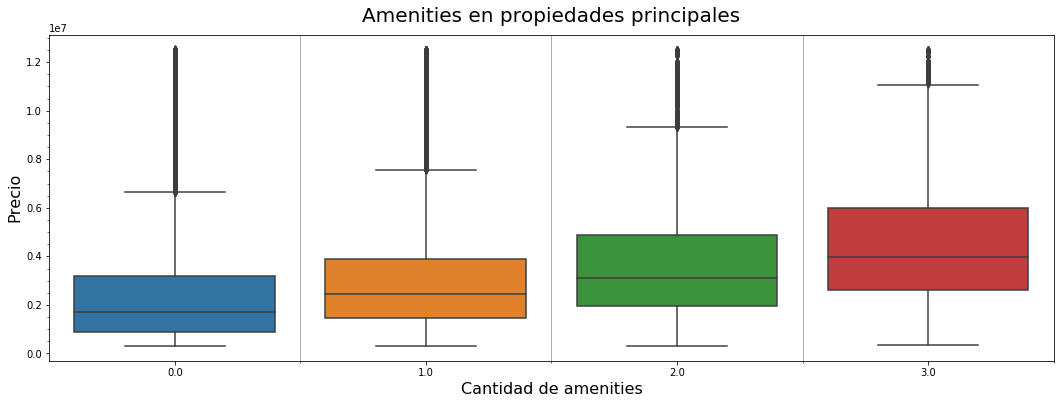

In [7]:
df['amenities'] = df.gimnasio + df.usosmultiples + df.piscina
dfProps = df[df.tipodepropiedad.isin(tiposPrincipales.index)]

from matplotlib.ticker import AutoMinorLocator
fig = plt.figure(figsize=(18,6))
ax1 = sns.boxplot('amenities', "precio", data=dfProps)

ax1.set_title('Amenities en propiedades principales', fontsize=20, y=1.02)
ax1.set_xlabel('Cantidad de amenities', fontsize=16)
ax1.set_ylabel('Precio', fontsize=16)
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

    # plt.savefig('cajas-amenities.png')

TypeError: 'int' object is not callable

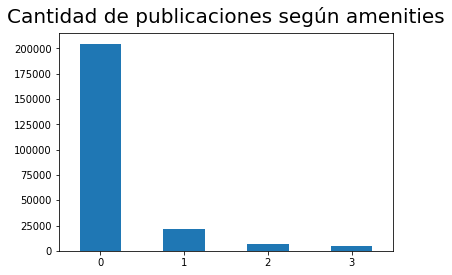

<Figure size 864x576 with 0 Axes>

In [8]:
ax = dfProps.groupby("amenities").amenities.value_counts().plot(kind='bar')
ax.set_title('Cantidad de publicaciones según amenities', fontsize=20, y=1.02)
ax.set_xlabel('', fontsize=16)
labels = [str(int(index[0])) for index, row in dfProps.groupby("amenities").amenities.value_counts().to_frame().iterrows()]
ax.set_xticklabels(labels, rotation=0)


plt.figure(figsize=(12, 8))
rects = ax.patches
# print(labels)

# place a text box in upper left in axes coords
# ax.text(0.05, 0.95, 'Pruebin', transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
i = 0
for rect, label in zip(rects, labels):
    if i not in [0,3]:
        aux = df[df.amenities == i]
        text = 'Piscinas: ' + str(df.piscina.size()) + '\n' + \
               'Gimnasio: ' + str(df.gimnasio.size()) + '\n' + \
               'Usos múltiples: ' + str(df.usosmultiples.size())
        print(text)
#         df.gimnasio + df.usosmultiples + df.piscina
        height = rect.get_height()
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(rect.get_x() + (rect.get_width() / 2) , height * 1.5, label,
                bbox=props, 
                ha='center', va='bottom', fontsize=12, rotation=angle)
        
        
# #         ax.text(rect.get_x() + (rect.get_width() * 5 / 4) , height + 5, label,
# #                 ha='center', va='bottom', fontsize=12, rotation=angle)#, rotation_mode='anchor' )
    i += 1

plt.show()

In [9]:
regiones = pd.read_csv('data/regionesMexico.csv',encoding = "UTF-8")
# regiones.info()
df = df.merge(regiones,on='provincia', how='inner')
# df.info()
df.groupby('zona')

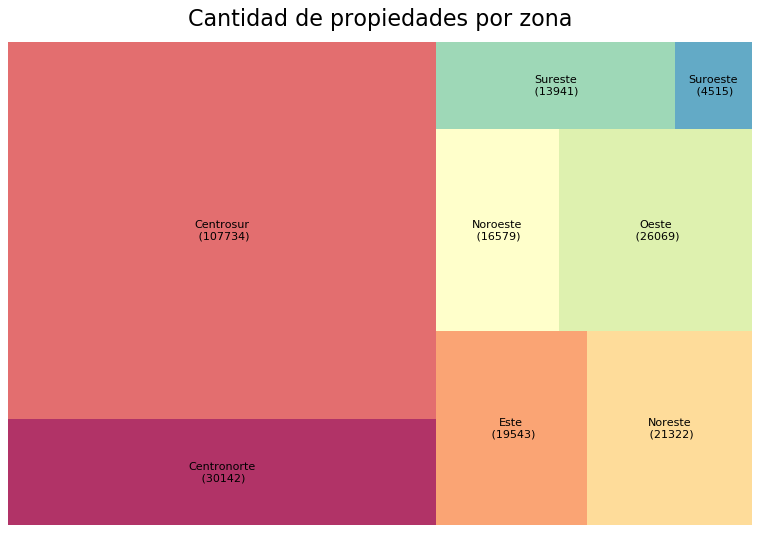

In [10]:
# pip install squarify
import squarify 

# Prepare Data
df_zonas = df.groupby('zona').size().reset_index(name='counts')
labels = df_zonas.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_zonas['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Cantidad de propiedades por zona', fontsize=20, y=1.02)
plt.axis('off')
plt.show()
# plt.savefig('zonas-cant.png')

In [11]:
df_p = df.groupby("provincia").precio.mean().to_frame()
df_p['precio_normalizado'] = df_p.precio / df_p.precio.max()
df_p['provincia'] = df_p.index

# df_p.info()
df_p.head(50)
# df_p[''].groupby("provincia").precio.mean()

,precio,precio_normalizado,provincia
provincia,,,
Aguascalientes,1477188.77,0.43,Aguascalientes
Baja California Norte,767441.75,0.22,Baja California Norte
Baja California Sur,1216452.82,0.35,Baja California Sur
Campeche,1570917.82,0.45,Campeche
Chiapas,1924125.72,0.55,Chiapas
Chihuahua,1744530.61,0.50,Chihuahua
Coahuila,1505305.45,0.43,Coahuila
Colima,1531380.16,0.44,Colima
Distrito Federal,3471705.09,1.00,Distrito Federal


<Figure size 1280x800 with 0 Axes>

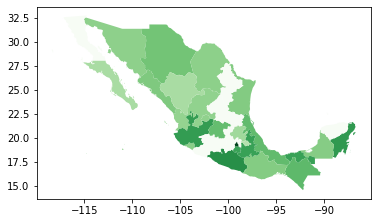

In [42]:
import geopandas as gpd
from shapely.geometry import Point, MultiPoint, Polygon
import cartopy.io.shapereader as shpreader


df_p = df.groupby("provincia").precio.mean().to_frame()
df_p['provincia'] = df_p.index
area_dict = dict(zip(df_p.provincia, df_p.precio))

    
def obtenerPrecioN(n):
    s = area_dict.get(n)
    if s is None:
        s = 0.1
    return s

mex = gpd.read_file('data/estadosMexico.shx')
mex = mex[mex.admin == 'Mexico'][['name', 'geometry']]

# df_p.head(50)
# mex.merge(df_p, on='name', how='inner')
# type(mex)
# mex.head(50)

mex['precio'] = mex.name.apply(obtenerPrecioN)
# mex.head(50)
plt.figure(figsize=(16,10), dpi= 80)
mex.plot(column='precio', cmap='Greens')

0.42737381779906475
0.5024996563813573
0.43359254654808455
0.45789228607689936
0.6921575642321558
0.4524917245276236
0.6626369952375074
0.5542307519605192
0.44110318241068114
0.41097696628368713
0.3503905982006298
0.4708267563502166
0.5443401657192046
0.6819973235323925
0.7341469951138766
0.4538167417422172
1.0
0.6620388498495984
0.6596435908919671
0.3760545619130618
0.5377644086739944
0.4187417312168191
0.42549373666853596
0.3486439524580263
0.31137245652738205
1.0


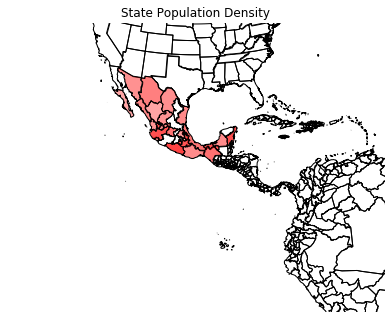

In [13]:
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from cartopy.io.shapereader import Reader

fig = plt.figure()

fname = 'data/estadosMexico.shp'
reader = Reader(fname)

# ax = plt.axes(projection=ccrs.PlateCarree())
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
# adm1_shapes = list(shpreader.Reader(fname).geometries())
# ax.set_extent([-122, 12, -84, 33], ccrs.Geodetic())
#USA
# ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.set_extent([-125, -66.5, -10, 40], ccrs.Geodetic())

# ax = plt.axes(projection=ccrs.Robinson())
# ax.add_geometries(Reader(fname).geometries(),
#                   ccrs.PlateCarree(),
#                   facecolor='white', hatch='xxxx')
# plt.show()

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('State Population Density')
area_dict = dict(zip(df_p.provincia, df_p.precio_normalizado))


#for state in shpreader.Reader(states_shp).geometries():
for astate in Reader(fname).records():
#     print(astate)
    ### You want to replace the following code with code that sets the
    ### facecolor as a gradient based on the population density above
    #facecolor = [0.9375, 0.9375, 0.859375]

    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_dens = area_dict.get(astate.attributes['name'])
        if state_dens is None:
            state_dens = 0
#         print(state_dens)
#         state_dens = df[ df.provincia == astate.attributes['name'] ].precio.mean()
    except:
        state_dens = 0
    #print(df_p[ df_p.index == astate.attributes['name'] ].precio_normalizado) 
    # simple scheme to assign color to each state}
    
    facecolor = matplotlib.colors.to_rgba('r', alpha=np.float16(state_dens).flat[0])

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)
# 
plt.show()

geopandas.geodataframe.GeoDataFrame

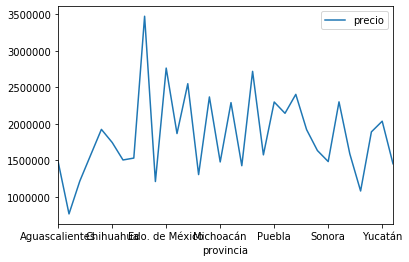

In [26]:
import geopandas as gpd
from shapely.geometry import Point, MultiPoint, Polygon
import cartopy.io.shapereader as shpreader

mex = gpd.read_file('data/estadosMexico.shx')
mex = mex[mex.admin == 'Mexico'][['name', 'geometry']]
provs = df.groupby(['provincia']).precio.agg('mean').to_frame()
provs['name'] = provs.index
# provs.info()
# provs.columns = ['name', 'precio']
provs.merge(mex, on='name', how='inner')
provs.plot()

# df = df.merge(regiones,on='provincia', how='inner')
# reader.head()
# mex.sample()
mex.plot()

zona
Centronorte    AxesSubplot(0.125,0.125;0.775x0.755)
Centrosur      AxesSubplot(0.125,0.125;0.775x0.755)
Este           AxesSubplot(0.125,0.125;0.775x0.755)
Noreste        AxesSubplot(0.125,0.125;0.775x0.755)
Noroeste       AxesSubplot(0.125,0.125;0.775x0.755)
Oeste          AxesSubplot(0.125,0.125;0.775x0.755)
Sureste        AxesSubplot(0.125,0.125;0.775x0.755)
Suroeste       AxesSubplot(0.125,0.125;0.775x0.755)
Name: antiguedad, dtype: object

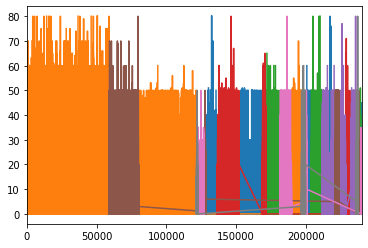

In [12]:

df.groupby('zona').antiguedad.plot()

In [ ]:
#Intento medio pelo para 
import joypy
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(df.groupby('zona'), column=['antiguedad'], by="class", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot antiguedad por zonas', fontsize=22)
plt.show()


In [ ]:
#Adaptar lo de abajo. Es: Stacked Area Chart. 1podría ser para mostrar 'sumados' la antiguedad de los edificios por región

In [ ]:
# Decide Colors 
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
columns = df.columns[1:]
labs = columns.values.tolist()

# Prepare data
x  = df['yearmon'].values.tolist()
y0 = df[columns[0]].values.tolist()
y1 = df[columns[1]].values.tolist()
y2 = df[columns[2]].values.tolist()
y3 = df[columns[3]].values.tolist()
y4 = df[columns[4]].values.tolist()
y5 = df[columns[5]].values.tolist()
y6 = df[columns[6]].values.tolist()
y7 = df[columns[7]].values.tolist()
y = np.vstack([y0, y2, y4, y6, y7, y5, y1, y3])

# Plot for each column
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, colors=mycolors, alpha=0.8)

# Decorations
ax.set_title('Night Visitors in Australian Regions', fontsize=18)
ax.set(ylim=[0, 100000])
ax.legend(fontsize=10, ncol=4)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(10000, 100000, 20000), fontsize=10)
plt.xlim(x[0], x[-1])

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.show()

In [ ]:
### Tipos de propiedas principales ###
tiposPrincipales = df.tipodepropiedad.value_counts().sort_values(kind="quicksort", ascending=False).to_frame().head(10)
#print(tiposPrincipales.values)
plt.figure(figsize=(18,6))
tiposPrincipales.plot(kind='bar')

tiposPrincipales['porcentaje'] = tiposPrincipales.values / tiposPrincipales.values.sum()
#print(tiposPrincipales.porcentaje)
print(tiposPrincipales)


In [ ]:
df[df.tipodepropiedad.isin(tiposPrincipales.head(5).tipodepropiedad.index)].info

In [ ]:
    df[df.tipodepropiedad.isin(tiposPrincipales.head(5).tipodepropiedad.index)].groupby(['provincia']).tipodepropiedad.value_counts()
    #print(tiposPrincipales.head(5).tipodepropiedad.index)

In [ ]:
df[df.tipodepropiedad.isin(tiposPrincipales.head(5).tipodepropiedad.index)].groupby(['provincia']).tipodepropiedad.value_counts()
#print(tiposPrincipales.head(5).tipodepropiedad.index)

In [ ]:
df['amenities'] = df.gimnasio + df.usosmultiples + df.piscina #+ df.escuelascercanas + df.centroscomercialescercanos
df['plus']  = df.habitaciones + df.banos + df.garages + df.gimnasio + df.usosmultiples + df.piscina + df.escuelascercanas + df.centroscomercialescercanos

In [ ]:
# df[['amenities', 'precio']].plot(x ='amenities', y='precio', kind = '')
dfProps = df[df.tipodepropiedad.isin(tiposPrincipales.head(5).tipodepropiedad.index)]

from matplotlib.ticker import AutoMinorLocator
fig = plt.figure(figsize=(18,6))
ax1 = sns.boxplot('amenities', "precio", data=dfProps) #, hue='modelLine')
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

In [ ]:
# Barras desmembrando eso
# Distribucion amenities
#df[['gimnasio', 'usosmultiples', 'piscina', 'amenities']].groupby('amenities').sum().plot(kind='bar');
# Precio vs amenities
#df[['amenities', 'precio']].groupby('amenities').agg({'precio':np.mean}).plot(kind='bar');

from pandas.plotting import parallel_coordinates

# Plot
plt.figure(figsize=(12,9), dpi= 80)
parallel_coordinates(
    df[['gimnasio', 'usosmultiples', 'piscina', 'garages', 'banos', 'habitaciones', 'precio']], 
    'precio')

# # Lighten borders
# plt.gca().spines["top"].set_alpha(0)
# plt.gca().spines["bottom"].set_alpha(.3)
# plt.gca().spines["right"].set_alpha(0)
# plt.gca().spines["left"].set_alpha(.3)

# plt.title('Parallel Coordinated of Diamonds', fontsize=22)
# plt.grid(alpha=0.3)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
plt.show()


In [ ]:
df['amenities'].head()

In [ ]:
# df[['amenities', 'precio']].plot(x ='amenities', y='precio', kind = '')
dfProps = df[df.tipodepropiedad.isin(tiposPrincipales.head(5).tipodepropiedad.index)]

from matplotlib.ticker import AutoMinorLocator
fig = plt.figure(figsize=(18,6))
ax1 = sns.boxplot('plus', "precio", data=dfProps) #, hue='modelLine')
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

In [ ]:
df['banos-metros'] = df['metroscubiertos'] / df['banos']
df['precio-bano-mts'] = df['precio'] /df['banos-metros']
plt.figure(figsize=(16,10), dpi= 80)

# fig=plt.subplots(1,2)
# sns.barplot(x=df['banos-metros'],y=df['precio'])
# sns.kdeplot(df[['banos-metros']], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.distplot(df['banos-metros'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

# sns.barplot(x=df['gimnasio'],y=df['precio_usd'],ax=ax[1])
plt.show()

In [ ]:
# Plot de correlaciones

plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df[['metroscubiertos', 'metrostotales', 'precio']], kind="reg", hue="precio")
plt.show()

C:\Users\Lucas\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Lucas\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


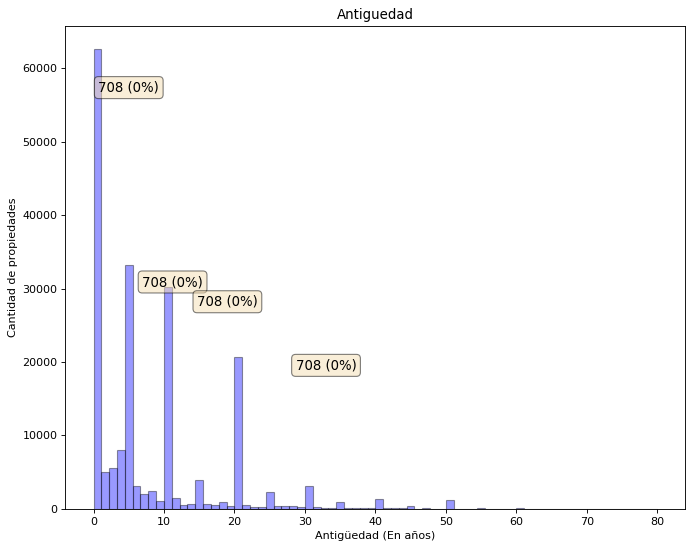

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8), dpi= 80)
# # matplotlib histogram
# plt.hist(df['antiguedad'], color = 'blue', edgecolor = 'black',
#          bins = int(360/5))

# seaborn histogram
ax = sns.distplot(df['antiguedad'], hist=True, kde=False, 
             bins=int(360/5), color = 'blue',
             hist_kws={'edgecolor':'black'})


# Add labels
plt.title('Antiguedad')
plt.xlabel('Antigüedad (En años)')
plt.ylabel('Cantidad de propiedades')

antiguedad_prom = df.groupby('antiguedad').antiguedad.value_counts().quantile(q=0.95)
# print(antiguedad_prom)
rects = ax.patches

# place a text box in upper left in axes coords
# ax.text(0.05, 0.95, 'Pruebin', transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
i = 0
for rect in rects:
    if int(rect.get_height()) > antiguedad_prom:
        height = rect.get_height()
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text( 5 + rect.get_x() * 1.4 , height * 0.90, label,
                bbox=props, 
                ha='center', va='bottom', fontsize=12, rotation=0)
        
        
#          ax.text(rect.get_x() + (rect.get_width() * 5 / 4) , height + 5, label,
#                  ha='center', va=--'bottom', fontsize=12, rotation=angle)#, rotation_mode='anchor' )
    i += 1

# df.antiguedad.plot(kind='hist', bind=5)